In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from datetime import datetime as dt

In [2]:
# Read the datasets from Bitcoin, Ethereum, and Cardano
btc = pd.read_csv('Data/BTC.csv')
eth = pd.read_csv('Data/ETH.csv')
ada = pd.read_csv('Data/ADA.csv')

In [4]:
print(btc.info(),eth.info(),ada.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4

# Preprocessing


In [7]:
def preprocess(crypto_df):
    crypto_df = crypto_df.drop(['SNo','Name','Symbol','High','Low','Open','Marketcap','Volume'], axis=1)
    crypto_df['Date'] = crypto_df['Date'].apply(lambda date: dt.strptime(date,'%Y-%m-%d'))
    crypto_df = crypto_df.rename(columns={'Date':'ds','Close':'y'})
    return crypto_df

In [8]:
prophet_btc = preprocess(btc)
prophet_btc.head()

,ds,y
0,2013-04-29,144.539993
1,2013-04-30,139.000000
2,2013-05-01,116.989998
3,2013-05-02,105.209999
4,2013-05-03,97.750000


In [9]:
prophet_eth = preprocess(eth)
prophet_eth.head()

,ds,y
0,2015-08-08,0.753325
1,2015-08-09,0.701897
2,2015-08-10,0.708448
3,2015-08-11,1.067860
4,2015-08-12,1.217440


In [10]:
prophet_ada = preprocess(ada)
prophet_ada.head()

,ds,y
0,2017-10-02,0.025932
1,2017-10-03,0.020816
2,2017-10-04,0.021931
3,2017-10-05,0.021489
4,2017-10-06,0.018539


# Prophet ML Model

In [11]:
def prophet(prophet_df):
    m = Prophet()
    m.fit(prophet_df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    forecast_df = forecast[['ds','yhat','yhat_lower','yhat_upper']]
    predict_graph = m.plot(forecast)
    component_graph = m.plot_components(forecast)
    
    return forecast_df, predict_graph, component_graph

## Bitcoin

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


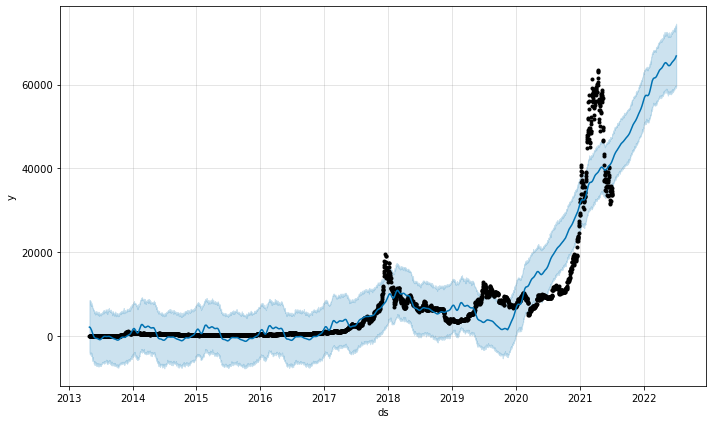

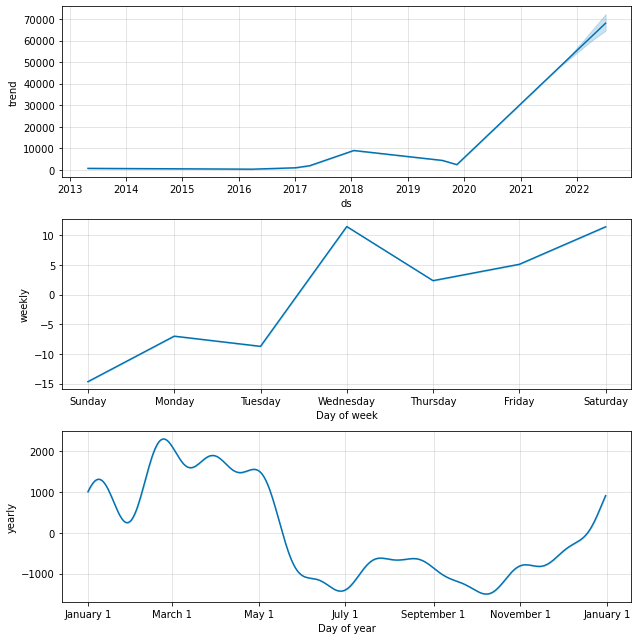

In [12]:
btc_forecast, btc_predictions, btc_components = prophet(prophet_btc)

In [13]:
btc_forecast

,ds,yhat,yhat_lower,yhat_upper
0,2013-04-29,2180.353467,-3739.588653,8295.550919
1,2013-04-30,2167.244711,-3956.779153,8649.272051
2,2013-05-01,2168.340194,-4227.482564,8576.597854
3,2013-05-02,2131.617290,-4043.627705,8455.863399
4,2013-05-03,2097.628761,-3971.164959,8570.559971
...,...,...,...,...
3351,2022-07-02,66432.290814,59167.574295,73585.672793
3352,2022-07-03,66498.903312,59642.530777,74219.913723
3353,2022-07-04,66604.261315,59542.441090,73888.419253
3354,2022-07-05,66704.808396,59425.870096,74531.251338


## Ethereum

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


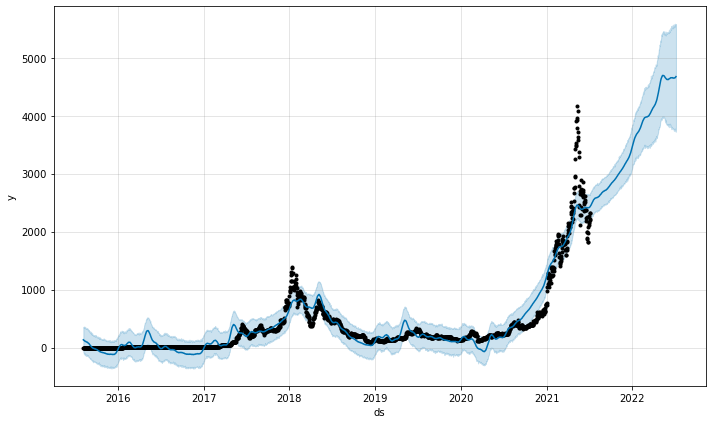

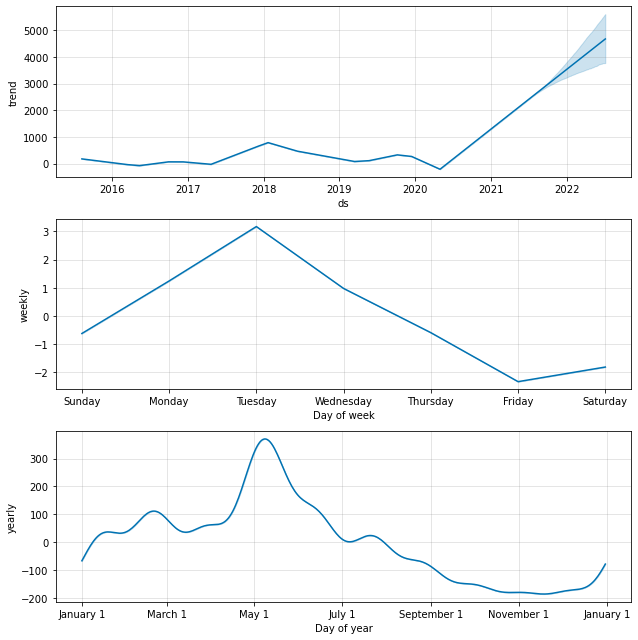

In [14]:
eth_forecast, eth_predictions, eth_components = prophet(prophet_eth)

In [15]:
eth_forecast

,ds,yhat,yhat_lower,yhat_upper
0,2015-08-08,134.942900,-76.514670,353.803197
1,2015-08-09,131.402080,-82.523758,348.485011
2,2015-08-10,128.889561,-106.942547,363.288484
3,2015-08-11,126.812320,-101.522112,363.901822
4,2015-08-12,120.969537,-94.891646,355.925877
...,...,...,...,...
2520,2022-07-02,4653.834777,3740.871751,5588.066713
2521,2022-07-03,4658.359053,3781.166287,5579.690486
2522,2022-07-04,4664.286088,3773.993072,5564.216580
2523,2022-07-05,4671.001246,3723.050985,5581.657488


## Cardano (ADA)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


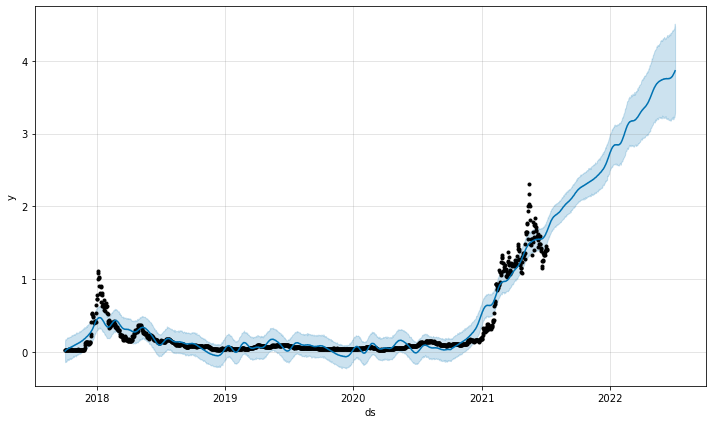

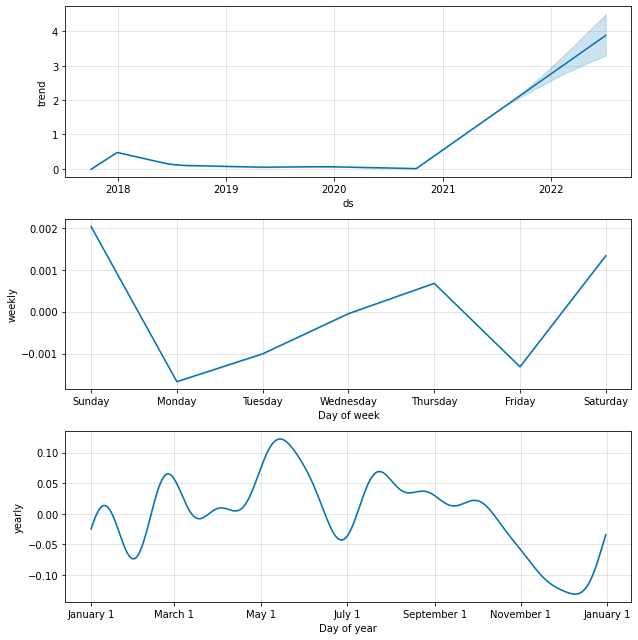

In [16]:
ada_forecast, ada_predictions, ada_components = prophet(prophet_ada)

In [17]:
ada_forecast

,ds,yhat,yhat_lower,yhat_upper
0,2017-10-02,0.008451,-0.144239,0.147816
1,2017-10-03,0.013787,-0.124407,0.173215
2,2017-10-04,0.019138,-0.140087,0.170137
3,2017-10-05,0.023980,-0.127571,0.170203
4,2017-10-06,0.025839,-0.134291,0.174412
...,...,...,...,...
1734,2022-07-02,3.823545,3.224566,4.440151
1735,2022-07-03,3.834237,3.229809,4.437122
1736,2022-07-04,3.841169,3.224696,4.467952
1737,2022-07-05,3.853044,3.256367,4.514133
